# Flights Dataset Exploration
## by Abdelrahman Walied

## Preliminary Wrangling

> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 2006 to 2008.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df_2006 = pd.read_csv("2006.csv")

In [3]:
df_2007 = pd.read_csv("2007.csv")

### What is the structure of your dataset?

> Let's look at how many records we have and the data types of each feature.

In [4]:
df_2006.shape, df_2007.shape

((7141922, 29), (7453215, 29))

Both years have close number of flight records. <br/>

So we have at total number of 14,595,137 flights (rows) with 29 features (columns).

In [5]:
print((df_2006.dtypes == df_2007.dtypes).sum()) # Should be equal to 29
df_2006.dtypes

29


Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
dtype: object

### What is/are the main feature(s) of interest in your dataset?

> My main features of interest is to figure out the causes of delays and flights being cancelled. and Check the United States performance to reduce different kinds of delays.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Let's take a look at the existing features

In [6]:
df_2006.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

Delays and cancellation features and causes are located in the following columns:

> Cancelled (0=No, 1=Yes) <br/>
> CancellationCode	reason for cancellation (A = carrier, B = weather, C = NAS, D = security) <br/>
> DepDelay  (Departure Delay) (in minutes) <br/>
> ArrDelay  (Arrival   Delay) (in minutes) <br/>
> CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay (in minutes) <br/>

So The visualizations will focus on exploring these columns

But before we begin the visualisations, I will drop the unused columns for the sake of memory space.

In [7]:
cols = ['DayofMonth', 'DayOfWeek', 'FlightNum', 'TailNum', 'TaxiIn', 'TaxiOut', 'Diverted']
df_2006.drop(cols, axis=1, inplace=True)
df_2007.drop(cols, axis=1, inplace=True)

## Univariate Exploration

> First of all, Let's check what is the most cause of flights being cancelled.

### Cancellation Cause

In [8]:
# Select cancelled flights
flights_cancelled_2006 = df_2006.loc[(df_2006.Cancelled == 1)]

In [9]:
flights_cancelled_2007 = df_2007[df_2007["Cancelled"] == 1]

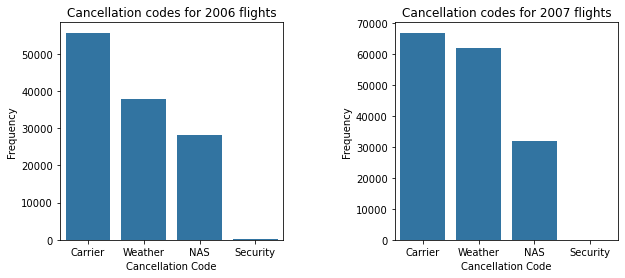

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

#Common polishing
xlabel= "Cancellation Code"
ylabel= "Frequency"
xlabel_ticks = ["Carrier","Weather","NAS","Security"]

# 2007
plot = sb.countplot(data=flights_cancelled_2006, x='CancellationCode', color=sb.color_palette()[0], order=["A","B","C","D"], ax=ax1);
plot.set_xticklabels(xlabel_ticks)
plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel)
plot.set_title("Cancellation codes for 2006 flights")

#2008
plot = sb.countplot(data=flights_cancelled_2007, x='CancellationCode', color=sb.color_palette()[0], order=["A","B","C","D"], ax=ax2);
plot.set_xticklabels(xlabel_ticks)
plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel)
plot.set_title("Cancellation codes for 2007 flights")

# Adjust space between plots
plt.subplots_adjust(wspace=0.5);

> Seems like the Carrier type causes more cancellations followed by the Weather.

> Let's see which carrier type has more cancellation frequency as we will meet a dead end if we wanted at anything considering the weather (No data to describe weather status).

In [11]:
# Exctracting Cancellations with code "A"
flights_cancelled_2006_A = flights_cancelled_2006[flights_cancelled_2006["CancellationCode"] == "A"]
flights_cancelled_2007_A = flights_cancelled_2007[flights_cancelled_2007["CancellationCode"] == "A"]

In [12]:
# Ordering indexes
carr_order_2006 = flights_cancelled_2006_A.UniqueCarrier.value_counts().index
carr_order_2007 = flights_cancelled_2007_A.UniqueCarrier.value_counts().index

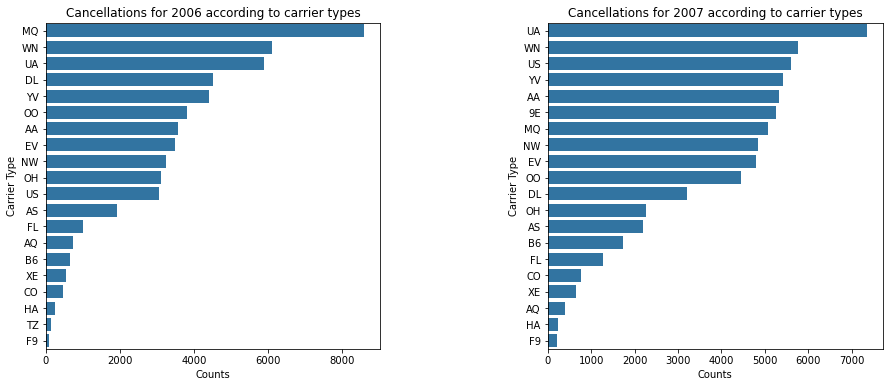

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

#Common polishing
ylabel= "Carrier Type"
xlabel= "Counts"

# 2007
plot = sb.countplot(data=flights_cancelled_2006_A, y='UniqueCarrier', color=sb.color_palette()[0], order=carr_order_2006, ax=ax1);
plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel)
plot.set_title("Cancellations for 2006 according to carrier types")

#2008
plot = sb.countplot(data=flights_cancelled_2007_A, y='UniqueCarrier', color=sb.color_palette()[0], order=carr_order_2007, ax=ax2);
plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel)
plot.set_title("Cancellations for 2007 according to carrier types")

# Adjust space between plots
plt.subplots_adjust(wspace=0.5);

> Seems like both carriers of "MQ" and "UA" have the most cancellation counts.<br/>
> <br/>
> Comparing each type from year to year we can see that "UA" has an increasing rate in cancellations while "MQ" has a very noticable decreasing rate in cancellations.<br/>
> <br/>
> Carrier type "F9" has the least cancellation rate.<br/>
> <br/>
> Another observation is that carrier type "WN" has a slight increasing cancellation rate in year 2007 than 2006 but it managed to stay in the second place when comparing. <br/>
> <br/>
> Finally, we can find out the carriers complete names from the "carriers.csv" file

In [14]:
carriers = pd.read_csv("../data/carriers.csv")
carriers[carriers.Code.isin(["MQ", "UA", "F9", "WN"])]

Code                   Description
517    F9        Frontier Airlines Inc.
848    MQ  American Eagle Airlines Inc.
1297   UA         United Air Lines Inc.
1388   WN        Southwest Airlines Co.

### Delay Cause

In [15]:
# In some cases a flight may depart/arrive a bit earlier or on time, so the Delay value would be negative or 0, let's filter
# these out (Delays are calculated in minutes)
df_filtered_2006 = df_2006.query("DepDelay > 0 and ArrDelay > 0")
df_filtered_2007 = df_2007.query("DepDelay > 0 and ArrDelay > 0")

> I will first explore the Departure Delay distribution.

In [16]:
# Checking bin size to be taken
print(df_filtered_2006.DepDelay.describe())
print()
print(df_filtered_2007.DepDelay.describe())

count    2.205230e+06
mean     3.744172e+01
std      4.872943e+01
min      1.000000e+00
25%      9.000000e+00
50%      2.100000e+01
75%      4.700000e+01
max      1.752000e+03
Name: DepDelay, dtype: float64

count    2.437712e+06
mean     3.898926e+01
std      5.185782e+01
min      1.000000e+00
25%      9.000000e+00
50%      2.200000e+01
75%      4.900000e+01
max      2.601000e+03
Name: DepDelay, dtype: float64


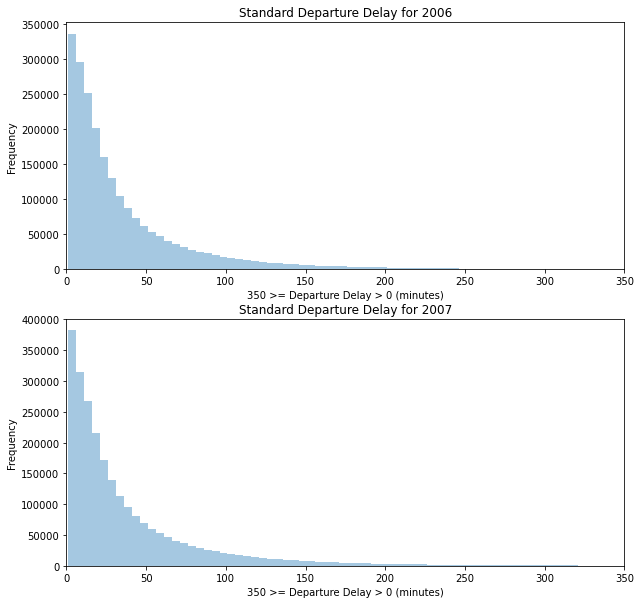

In [17]:
# Plot the distributions
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))

# Common Polishing features
xlabel = "350 >= Departure Delay > 0 (minutes)"
ylabel = "Frequency"

bins = np.arange(df_filtered_2006.DepDelay.min(), df_filtered_2007.DepDelay.max()+5, 5)
plot = sb.distplot(df_filtered_2006.DepDelay, bins=bins, kde=False, ax=ax1)
plot.set(xlim=(0,350))
plot.set_title("Standard Departure Delay for 2006")
plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel)

bins = np.arange(df_filtered_2007.DepDelay.min(), df_filtered_2007.DepDelay.max()+5, 5)
plot = sb.distplot(df_filtered_2007.DepDelay, bins=bins, kde=False, ax=ax2)
plot.set(xlim=(0,350))
plot.set_title("Standard Departure Delay for 2007")
plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel)

plt.show();

**Comparing both plots:** <br/>

1) the delay rates in 2006 are high in frequencies. <br/>
2) the delay rates in 2007 are even higher in frequencies of delays below 50 minutes but has the same range of delay durations (neglicting the outliers).

> Standard DepDelays distrubutions have very low frequencies on high delay durations (That's why i limited the plot to 500 delay minutes max), but these can be looked at if we used the logarithmic method.

In [18]:
# Preparing the bins
print(np.log10(df_filtered_2006.DepDelay.describe()))
print()
print(np.log10(df_filtered_2007.DepDelay.describe()))

count    6.343454
mean     1.573356
std      1.687791
min      0.000000
25%      0.954243
50%      1.322219
75%      1.672098
max      3.243534
Name: DepDelay, dtype: float64

count    6.386982
mean     1.590945
std      1.714814
min      0.000000
25%      0.954243
50%      1.342423
75%      1.690196
max      3.415140
Name: DepDelay, dtype: float64


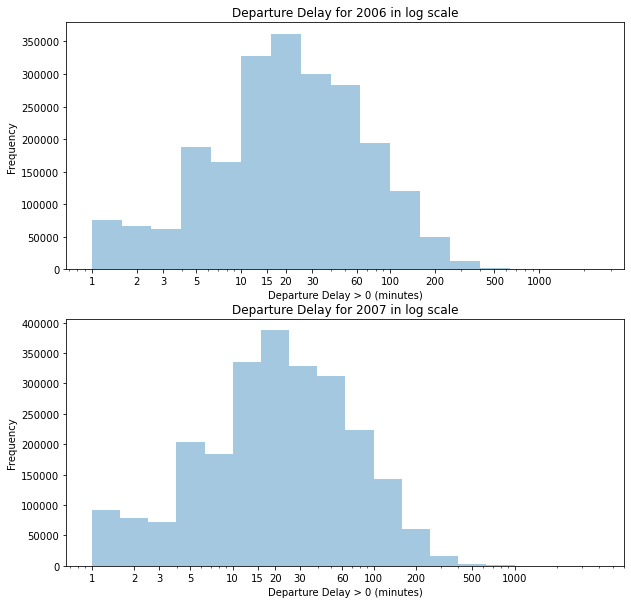

In [19]:
# Plot the distributions
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10))

# Common Polishing features
xlabel = "Departure Delay > 0 (minutes)"
ylabel = "Frequency"
ticks = [1, 2, 3, 5, 10, 15, 20, 30, 60, 100, 200, 500, 1000]

bins = 10 ** np.arange(np.log10(df_filtered_2006.DepDelay.min()), np.log10(df_filtered_2006.DepDelay.max())+0.2, 0.2)
plot = sb.distplot(df_filtered_2006.DepDelay, bins=bins, kde=False, ax=ax1)
plot.set(xscale="log")
plot.set(xticks=ticks, xticklabels=ticks)
plot.set_title("Departure Delay for 2006 in log scale")
plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel)

bins = 10 ** np.arange(np.log10(df_filtered_2007.DepDelay.min()), np.log10(df_filtered_2007.DepDelay.max())+0.2, 0.2)
plot = sb.distplot(df_filtered_2007.DepDelay, bins=bins, kde=False, ax=ax2)
plot.set(xscale="log")
plot.set(xticks=ticks, xticklabels=ticks)
plot.set_title("Departure Delay for 2007 in log scale")
plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel)
plt.show();

**Comparing both plots:** <br/>

1) Both plots are right skewed. <br/>
2) Both plots have the same peaks but at different frequencies. One peak is at 5 mins delay, and the other is between 15-20 mins or we can extend the peak range to set it between 10-30 mins.

> Now, Let's explore the Arrival Delay Distribution

In [20]:
print(df_filtered_2006.ArrDelay.describe())
print()
print(df_filtered_2007.ArrDelay.describe())

count    2.205230e+06
mean     3.954375e+01
std      5.047500e+01
min      1.000000e+00
25%      1.000000e+01
50%      2.300000e+01
75%      5.000000e+01
max      1.779000e+03
Name: ArrDelay, dtype: float64

count    2.437712e+06
mean     4.135148e+01
std      5.345593e+01
min      1.000000e+00
25%      1.000000e+01
50%      2.300000e+01
75%      5.200000e+01
max      2.598000e+03
Name: ArrDelay, dtype: float64


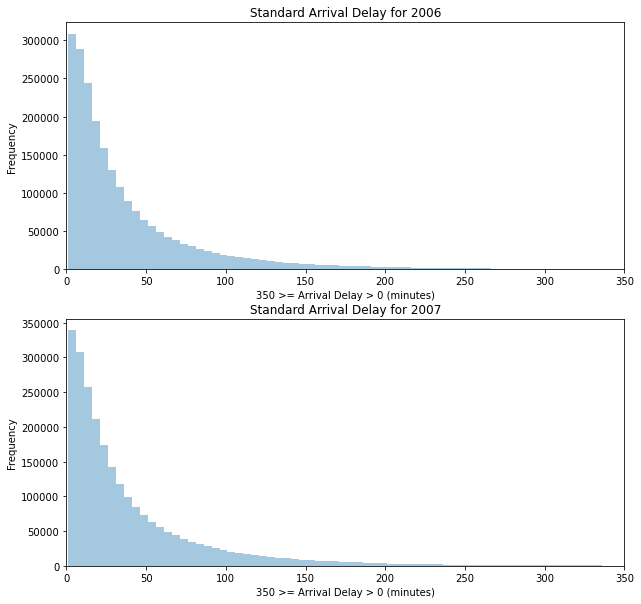

In [21]:
# Plot the distributions
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))

# Common Polishing features
xlabel = "350 >= Arrival Delay > 0 (minutes)"
ylabel = "Frequency"

bins = np.arange(df_filtered_2006.ArrDelay.min(), df_filtered_2007.ArrDelay.max()+5, 5)
plot = sb.distplot(df_filtered_2006.ArrDelay, bins=bins, kde=False, ax=ax1)
plot.set(xlim=(0,350))
plot.set_title("Standard Arrival Delay for 2006")
plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel)

bins = np.arange(df_filtered_2007.ArrDelay.min(), df_filtered_2007.ArrDelay.max()+5, 5)
plot = sb.distplot(df_filtered_2007.ArrDelay, bins=bins, kde=False, ax=ax2)
plot.set(xlim=(0,350))
plot.set_title("Standard Arrival Delay for 2007")
plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel)

plt.show();

**Comparing Both Plots** <br/>

Arrival Delays in 2007 have higher frequencies but not the same range of delay durations even with neglecting the outliers. In 2006 Delays range between 1 and roughly 270 minutes, In 2007 Delays range between 1 and roughly 250 minutes.

> Let's re-apply the logarithmic method as we did in the departure delay distributions.

In [22]:
# Preparing the bins
print(np.log10(df_filtered_2006.ArrDelay.describe()))
print()
print(np.log10(df_filtered_2007.ArrDelay.describe()))

count    6.343454
mean     1.597078
std      1.703076
min      0.000000
25%      1.000000
50%      1.361728
75%      1.698970
max      3.250176
Name: ArrDelay, dtype: float64

count    6.386982
mean     1.616491
std      1.727996
min      0.000000
25%      1.000000
50%      1.361728
75%      1.716003
max      3.414639
Name: ArrDelay, dtype: float64


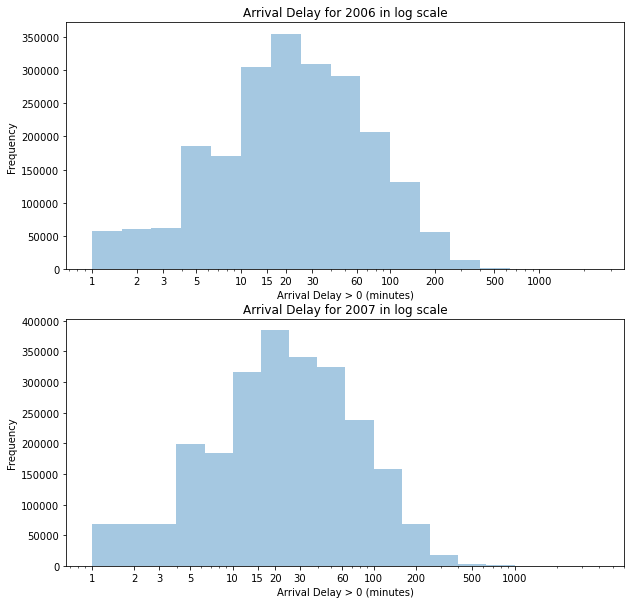

In [23]:
# Plot the distributions
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10))

# Common Polishing features
xlabel = "Arrival Delay > 0 (minutes)"
ylabel = "Frequency"
ticks = [1, 2, 3, 5, 10, 15, 20, 30, 60, 100, 200, 500, 1000]

bins = 10 ** np.arange(np.log10(df_filtered_2006.ArrDelay.min()), np.log10(df_filtered_2006.ArrDelay.max())+0.2, 0.2)
plot = sb.distplot(df_filtered_2006.ArrDelay, bins=bins, kde=False, ax=ax1)
plot.set(xscale="log")
plot.set(xticks=ticks, xticklabels=ticks)
plot.set_title("Arrival Delay for 2006 in log scale")
plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel)

bins = 10 ** np.arange(np.log10(df_filtered_2007.ArrDelay.min()), np.log10(df_filtered_2007.ArrDelay.max())+0.2, 0.2)
plot = sb.distplot(df_filtered_2007.ArrDelay, bins=bins, kde=False, ax=ax2)
plot.set(xscale="log")
plot.set(xticks=ticks, xticklabels=ticks)
plot.set_title("Arrival Delay for 2007 in log scale")
plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel)
plt.show();

**Comparing both plots:** <br/>

1) Both plots are right skewed. <br/>
2) Both plots have the same peaks but at different frequencies. One peak is at 5 mins delay, and the other is between 15-20 mins or we can extend the peak range to set it between 10-30 mins.

**Comparing Departure and Arrival Distributions** <br/>
(By using the same bins steps) <br/>
The distributions are close to be identical. The slight differences may be because of other delay factors which will be analysed in the multivariate section.

### Univariate Exploration Summary
1. We took of by looking what factor causes more flight cancels. We found out that carrier of code "A" was the highest factor followed by the weather of code "B" <br/><br/>

2. After that we looked at what type of carriers has the most flight cancels from 2006 to 2007, We found out that American Eagle Airlines "MQ" carriers has the most flight cancels in 2006 but the counts significally fell back in 2007, while United Air Lines "UA" carriers had the third place in 2006, but in 2007 the counts has even increased to be in the first place. We also pointed out that Southwest Airlines "WN" carriers had increasing counts during the 2 years but it managed to secure the second place in our visualizations, and the last point on this stage was that Frontier Airlines "F9" carriers had the least flight cancel counts. <br/><br/>

3. Then, We followed with Delays exploration. We first looked at the departure delays -after execluding the negative values (early departure records) and high delay durations (outliers)- at a standard scale, we found out that delays in 2007 have higher frequencies than it was in 2006, but has the same delays duration range. <br/><br/>

4. We followed by looking at high delay durations (outliers) using the logarithmic plotting method and we noticed that the distributions were right skewed and there were 2 peaks, one was at durations around 5 mins and the other was on durations around 15-20 mins or at an expanding range: around 10-30 mins. <br/><br/>

5. We then continued to explore the arrival distrbutions and suprisingly the plots when almost identical to those of departure distrbutions. there were some differences in frequencies but these means that some flights didn't interupt much with other delays factors, but the axis ranges are very close to each other.

### Univariate Exploration Conclusions

1. Carrier Code "A" has the most flight cancels followed by Weather Code "B". <br/><br/>
2. Air Lines "UA" & Eagle Airlines "MQ" Carriers have the most flight cancels counts. <br/><br/>
3. Dep/Arr Delays have almost identical distrbutions. <br/><br/>
4. Delays are peaked on durations around 5 mins & 10-30 mins. <br/><br/>

## Bivariate Exploration

> In the previous section we noticed that Departure and Arrival Delays distributions are somehow identical to each other.

### Is there any relation between them?

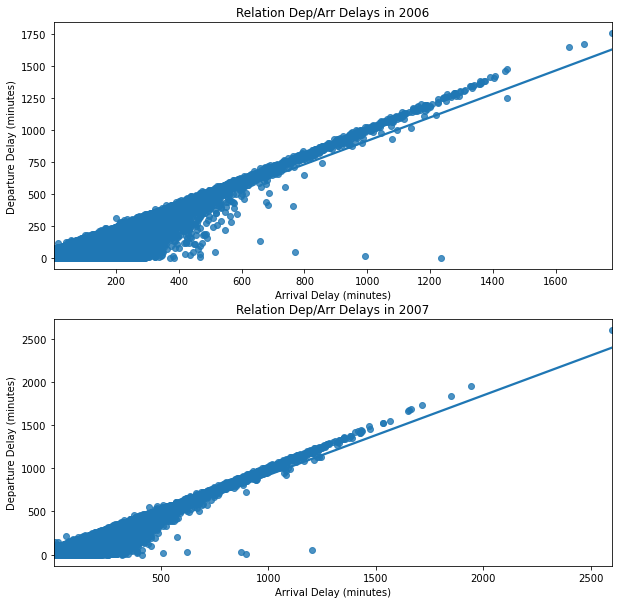

In [24]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))

# Common Polishing features
xlabel = "Arrival Delay (minutes)"
ylabel = "Departure Delay (minutes)"

plot = sb.regplot(data=df_filtered_2006, x="ArrDelay", y="DepDelay", ax=ax1)
plot.set_title("Relation Dep/Arr Delays in 2006")
plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel)

plot = sb.regplot(data=df_filtered_2007, x="ArrDelay", y="DepDelay", ax=ax2)
plot.set_title("Relation Dep/Arr Delays in 2007")
plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel)

plt.show();

> both plots show strong positive correlations, tho there are outliers but we can see that the points begins to vanish after the 1500 minutes tick and the intensity of the points seems abit identical as they mostly group when we compare using the same ticks. This explains why the distributions in the univariate section seem to be identical.

### But do these delays happen all of the year or on specific months?

In [25]:
# for plotting, We need to calculate the mean of delays. Since we don't have a large number of outliers and the number of
# records are over 200K, there is no need to execlude them

data_2006 = df_filtered_2006.groupby("Month")[["DepDelay", "ArrDelay"]].mean()
data_2007 = df_filtered_2007.groupby("Month")[["DepDelay", "ArrDelay"]].mean()

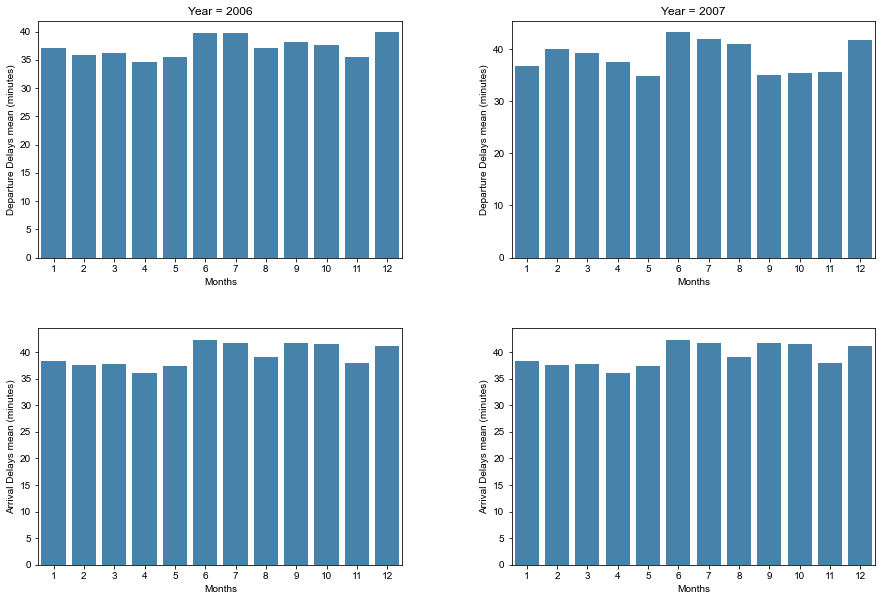

In [26]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

# Common Polishing features
xlabel = "Months"
ylabel_dep = "Departure Delays mean (minutes)"
ylabel_arr = "Arrival Delays mean (minutes)"
color = sb.color_palette()[0]


plot = sb.barplot(x=data_2006.index, y=data_2006.DepDelay, color=color, ax=ax[0,0], alpha=0.9)
plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel_dep)
plot.set_title("Year = 2006")

plot = sb.barplot(x=data_2007.index, y=data_2007.DepDelay, color=color, ax=ax[0,1], alpha=0.9)
plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel_dep)
plot.set_title("Year = 2007")

plot = sb.barplot(x=data_2006.index, y=data_2006.ArrDelay, color=color, ax=ax[1,0], alpha=0.9)
plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel_arr)

plot = sb.barplot(x=data_2006.index, y=data_2006.ArrDelay, color=color, ax=ax[1,1], alpha=0.9)
plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel_arr)

sb.set(style="darkgrid")
plt.subplots_adjust(wspace=0.3, hspace=0.3);

**Comparing the plots:**
We can see that delays most delays have high rates on months (6,7,12) => (June, July, and December).

### What about cancellations per month?

Let's also continue our cancellation analysis from the univaraite section. Here we can display the cancellation of each factor per month

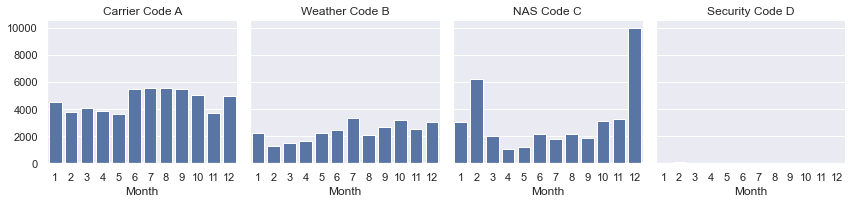

In [27]:
# Plots for 2006
_2006 = sb.FacetGrid(data=flights_cancelled_2006, col="CancellationCode")
_2006.map(sb.countplot, "Month", order=np.arange(1,13,1))

# titles= ["Carrier Code A", "Weather Code B", "NAS Code C", "Security Code D"]
axes = _2006.axes.flatten()
axes[0].set_title("Carrier Code A")
axes[1].set_title("Weather Code B")
axes[2].set_title("NAS Code C")
axes[3].set_title("Security Code D");

**From comparing the plots:**
1. We see that flight cancels in 2006 caused by carriers are mostly in months (6 -> 9) => (June -> September). <br/><br/>
2. Another clear factor is the NAS which happened in months (2 & 12) => (February & December). <br/><br/>
3. Flights didn't suffer much from the weather cancels comparing to other factors. <br/><br/>
4. Cancels due to Security seems to be none.

Let's check those of 2007

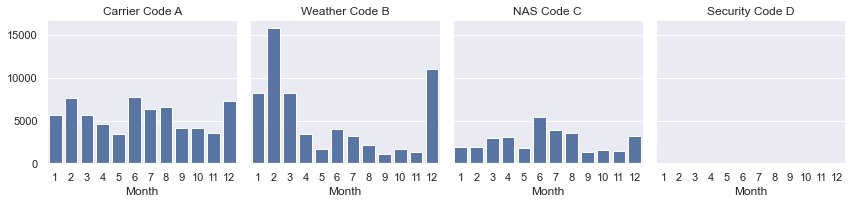

In [28]:
# Plots for 2007
_2007 = sb.FacetGrid(data=flights_cancelled_2007, col="CancellationCode")
_2007.map(sb.countplot, "Month", order=np.arange(1,13,1))

# titles= ["Carrier Code A", "Weather Code B", "NAS Code C", "Security Code D"]
axes = _2007.axes.flatten()
axes[0].set_title("Carrier Code A")
axes[1].set_title("Weather Code B")
axes[2].set_title("NAS Code C")
axes[3].set_title("Security Code D");

**From comparing the plots:**
1. We see that flight cancels in 2007 caused by carriers are mostly in months (6 -> 8) => (June -> August). <br/><br/>
2. NAS cancels have its counts significally dropped down. <br/><br/>
3. Flights this year did suffer from the weather cancels espicially on February and December. <br/><br/>
4. Cancels due to Security seems again to be none.

**Comparing results from both years:**
1. It seems that the US is facing hard challenges to mantain carriers and reduce it's cancellation counts, but it did a improved abit in 2007. <br/><br/>

2. US did great improves in National Aviation Systems to reduce its cancels. <br/><br/>

3. US has great security procedures that cancels caused by it are close to none.

We can finally close this section with a final visualization that shows the corellation between delay columns which will help us prove all of the previous results using mathematics.

In [29]:
# Collecting all columns
cols = ['DepDelay', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
data_06 = df_filtered_2006[cols]
data_07 = df_filtered_2007[cols]

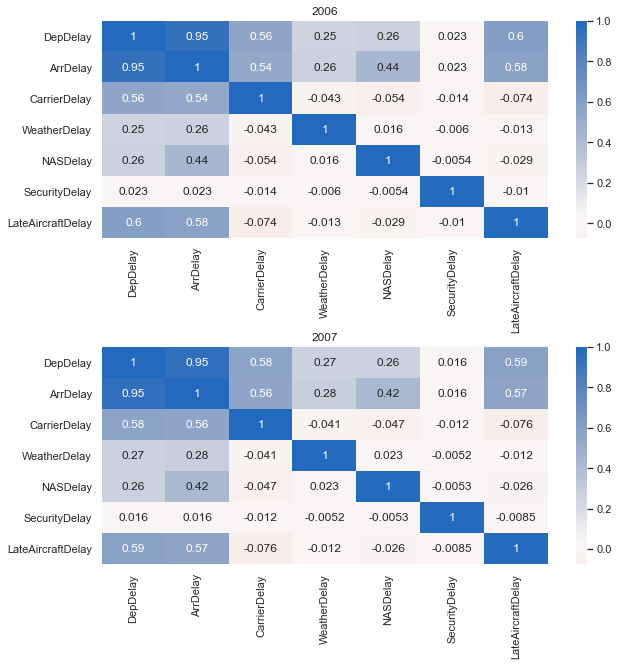

In [30]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))

plot = sb.heatmap(data=data_06.corr(), cmap='vlag_r', center=0, annot=True, ax=ax1)
plot.set_title("2006")

plot = sb.heatmap(data=data_07.corr(), cmap='vlag_r', center=0, annot=True, ax=ax2)
plot.set_title("2007");

plt.subplots_adjust(hspace=0.5)

So we do have identical results with the previous plots, where:
> DepDelay is highly correlated with ArrDelay

Suprisingly factors affecting Dep/Arr Delays the most are LateAircraftDelay followed by CarrierDelay. We can continue to investigate this furthur in the multivariate section.

### Bivariate Exploration Summary
1. In this section we took off by visualizing the relation between Departure and Arrival Delays. We found out that there are strong correlations. <br/><br/>

2. After that, We took a deeper approach and check the delay means during each month across both years. We found out that most delays are in June, July, and December. <br/><br/>

3. Then, we continued our cancellation analysis to check the cancellation causes during each month across both years. We found out that most carrier cancels in 2006 happened between June and Semptember but it decreased abit in 2007 that most cancels happened between June and August. For Weather cause flights were cancelled more in 2007 espicially in Febraury and December. For NAS cause 2006 flights suffered more espicially in February and December but delays droped down in 2007. Lastly, Security delays where close to none in both years. <br/><br/>

4. Finally, we used mathematics to aid us with proving all of the previous visualizations and we implemented it into a heatmap to plot correlations between all of the Delay columns and We did obtain identical results.

### Bivariate Exploration Conclusions
1. Departure and Arrival Delays are strongly correlated. <br/><br/>

2. Most delays took place in June, July, and December. <br/><br/>

3. Most carrier cancels took place between June and August. <br/><br/>

4. 2006 suffered from NAS cancels espicially in February and December. <br/><br/>

5. 2007 suffered from Weather cancels espicially in February and December. <br/><br/>

6. US did significant improves in terms of National Aviation Systems to reduce cancels, a slight improve considering carrier cancels but its threat still stands, and a stable perfect security cancels which is close to none.

## Multivariate Exploration


### Which Kinds of Delays affects Dep/Arr Delays the most?

As mentioned at the start of the exploration, we have 5 factors that affects the Dep/Arr Delays which are:
['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


Instead of using a univariate approach and plot 2 histograms of each factor for both years and compare the distrbutions, we can plot a single barchart which contains the mean delay minutes of each factor for both years.

In [31]:
# First I calculated the mean for each factor
delay_factors_2006 = df_filtered_2006[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].mean()
delay_factors_2007 = df_filtered_2007[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].mean()

In [32]:
# Then Grouped both serieses into one dataframe and reshaped them using the melt function
data = pd.DataFrame([delay_factors_2006, delay_factors_2007])
data["year"] = [2006, 2007]
data = data.melt("year", var_name='Delay Cause',  value_name='vals')
data

year        Delay Cause       vals
0  2006       CarrierDelay  10.897049
1  2007       CarrierDelay  11.675315
2  2006       WeatherDelay   2.196712
3  2007       WeatherDelay   2.351326
4  2006           NASDelay   9.142123
5  2007           NASDelay   9.179606
6  2006      SecurityDelay   0.100342
7  2007      SecurityDelay   0.072493
8  2006  LateAircraftDelay  14.616346
9  2007  LateAircraftDelay  15.586780

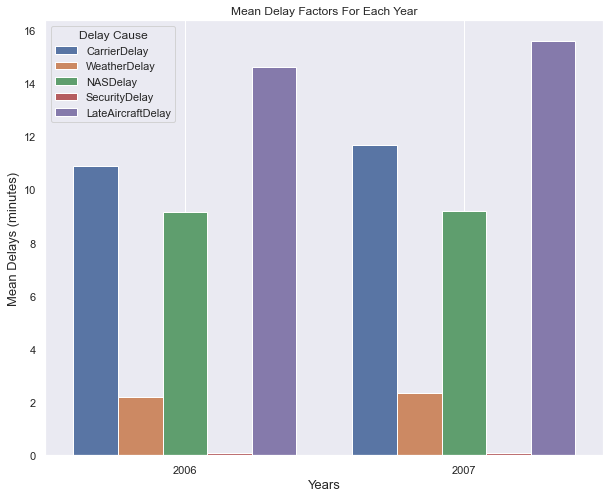

In [33]:
# Finally, I Plotted the data
fig, ax = plt.subplots(figsize=(10,8))
sb.barplot(data=data, x="year", y="vals", hue="Delay Cause", ax=ax)
plt.title("Mean Delay Factors For Each Year")
plt.ylabel("Mean Delays (minutes)", fontsize=13)
plt.xlabel("Years", fontsize=13)
plt.grid()
plt.show();

**Observing the plot**

1) we can clearly see that Delays related to Planes (CarrierDelay and LateAircraftDelay) are what affects Dep/Arr Delays the most. <br/>
2) These Delay Factors has even increased in 2007.<br/>
3) Other delay causes don't have a strong effect on Dep/Arr Delays and they have almost constant rates during both years.<br/>
4) Security Delay is the factor that has the least effect on Dep/Arr Delays.<br/>

We can even take a deeper look if we expanded from years distrbution to months distrbution

In [34]:
# First I selected the needed columns, grouped them by month, calculated the mean of each delay cause and reseted the index
# to prepare both datasets for melting
data_06 = df_filtered_2006[['Month', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].groupby("Month").mean()
data_06 = data_06.reset_index()

data_07 = df_filtered_2007[['Month', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].groupby("Month").mean()
data_07 = data_07.reset_index()

In [35]:
# Reshaping both datasets
data_06 = data_06.melt(id_vars="Month", var_name="Delay Cause", value_name="vals")
data_07 = data_07.melt(id_vars="Month", var_name="Delay Cause", value_name="vals")

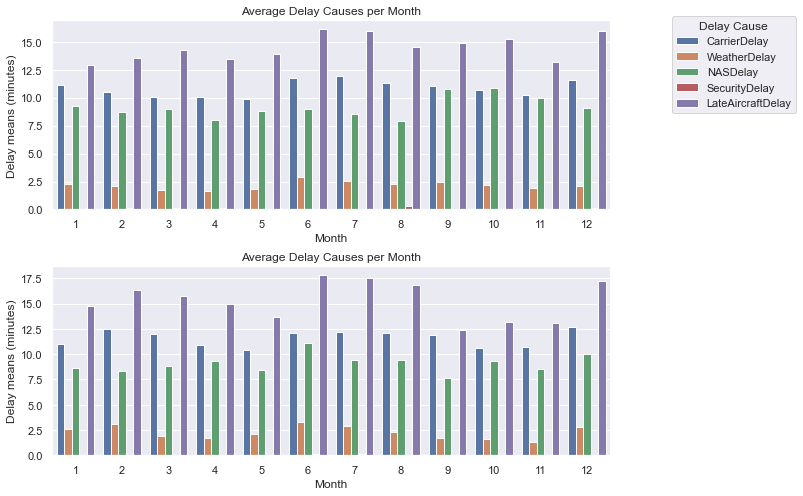

In [36]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,8))

# Plot for 2006
plot = sb.barplot(data=data_06, x="Month", y="vals", hue="Delay Cause", ax=ax1)
plot.legend(bbox_to_anchor=(1.1, 1.05), title="Delay Cause")
plot.set_ylabel("Delay means (minutes)")
plot.set_title("Average Delay Causes per Month")

plot = sb.barplot(data=data_07, x="Month", y="vals", hue="Delay Cause", ax=ax2)
plot.set_ylabel("Delay means (minutes)")
plot.set_title("Average Delay Causes per Month");

plt.subplots_adjust(hspace=0.3)
# There is no need to replot the legend as it's already declared on the top (Increase the ink-to-data rate)
# If u want to show the legend, simply switch the # in the below lines
plot.legend_.remove();
#plot.legend(bbox_to_anchor=(1.1, 1.05), title="Delay Cause");

So we do have identical results, the most affecting delay cause is the Late Aircraft Delay followed by the Carrier Delay.

Highest Late Aircraft Delays took place in June, July, and December (6, 7 & 12).

Another point is that the United States seems to be facing some hard challenges in Carriers mantainence.

If we looked at the provided data and results from previous visualizations, we notice that we have the carrier name mentioned in most of our visualizations. we can actually reshape the data and plot the average carrier delays for each carrier in each month and expand the visualization to group both 2006 and 2007.

### What are the carrier delays of each carrier for each month?

In [37]:
# first let's prepare the required columns
data_06 = df_filtered_2006[["Month", 'UniqueCarrier', 'CarrierDelay']].groupby(["Month", 'UniqueCarrier']).mean("CarrierDelay")
data_06 = data_06.reset_index()
data_06 = data_06.pivot(index="UniqueCarrier", columns="Month", values="CarrierDelay")

data_07 = df_filtered_2007[["Month", 'UniqueCarrier', 'CarrierDelay']].groupby(["Month", 'UniqueCarrier']).mean("CarrierDelay")
data_07 = data_07.reset_index()
data_07 = data_07.pivot(index="UniqueCarrier", columns="Month", values="CarrierDelay")

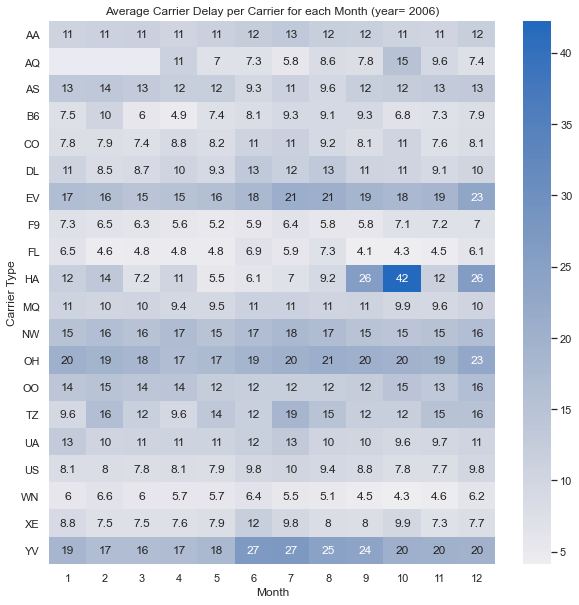

In [53]:
fig, ax = plt.subplots( figsize=(10,10))

plot = sb.heatmap(data=data_06, annot=True, center=0, cmap='vlag_r', ax=ax)
plot.set_yticklabels(plot.get_yticklabels(), rotation=0)
plot.set_ylabel("Carrier Type")
plot.set_title("Average Carrier Delay per Carrier for each Month (year= 2006)");

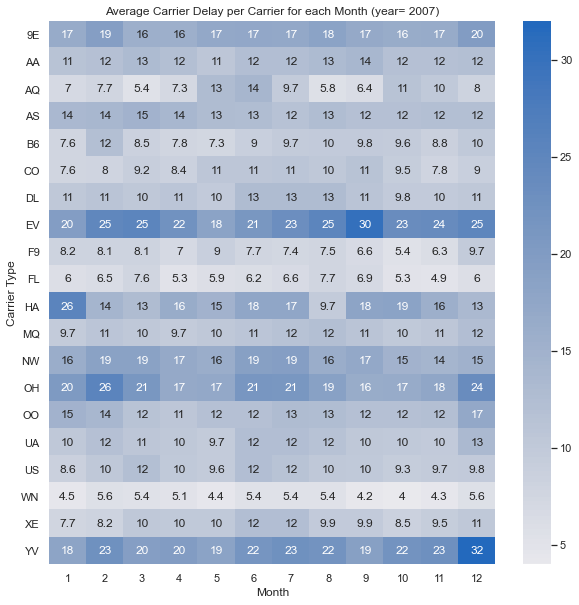

In [52]:
fig, ax = plt.subplots( figsize=(10,10))

plot = sb.heatmap(data=data_07, annot=True, center=0, cmap='vlag_r', ax=ax)
plot.set_yticklabels(plot.get_yticklabels(), rotation=0)
plot.set_ylabel("Carrier Type")
plot.set_title("Average Carrier Delay per Carrier for each Month (year= 2007)");
plt.show();

In [39]:
carriers[carriers.Code.isin(["HA", "EV", "YV", "9E", "OH"])]

Code                  Description
84     9E       Pinnacle Airlines Inc.
505    EV  Atlantic Southeast Airlines
619    HA       Hawaiian Airlines Inc.
936    OH                  Comair Inc.
1465   YV           Mesa Airlines Inc.

**Looking at 2006 distributions:**
1. Each of Atlantic Southeast Airlines "EV", Mesa Airlines "YV", Comair "OH" has medium delays during the whole year.
2. Hawaiian Airlines "HA" carriers had heavy delays on October.

**Looking at 2007 distributions:**
1. Each of Atlantic Southeast Airlines "EV", Mesa Airlines "YV", Comair "OH" has increased delays and stayed during the whole year.
2. Atlantic Southeast Airlines "EV" had heavy delays in September and Mesa Airlines "YV" had heavy delays in December.
3. Hawaiian Airlines "HA" carriers had a slight increase in delays during the year.
4. Pinnacle Airlines "9E" delays increased to the medium level.

**Looking at both distributions:**
1. Atlantic Southeast Airlines "EV", Mesa Airlines "YV", Comair "OH" have the most Carrier Delays.

### Multivariate Exploration Summary

1. We began with checking which delay factor affects the Dep/Arr Delay the most. We took 2 approaches to answer that question, the first one was using the year as a third scale, We calculated the mean delays of each factor and plotted them according to years summary (2006 & 2007). <br/><br/>

2. The second approach was to use the month as a third scale, We calculated the mean delays of each factor and plotted them according to each month for both years. <br/><br/>

3. Both approaches led to the same result which was that the most affecting cause is the Late Aircraft Delay followed by Carrier Delay. <br/><br/>

4. Finally, We used all the available data related to carriers to answer a tricky question which was "What are the carrier delays of each carrier for each month?" and plotted the answer into a heatmap.

### Multivariate Exploration Conclusions

1. Late Aircraft Delay and Carrier Delay are the most affecting factors on Dep/Arr Delays.
2. Highest Late Aircraft Delays took place in June, July, and December (6, 7 & 12).
3. Atlantic Southeast Airlines "EV", Mesa Airlines "YV", Comair "OH" have the most Carrier Delays.
4. The United States seems to be facing some hard challenges in Carriers mantainence.

### US Performance Analysis Conclusions

1. It seems that the US is facing hard challenges to mantain carriers and reduce it's cancellation counts, but it did a improved abit in 2007. <br/><br/>

2. US did great improves in National Aviation Systems to reduce its cancels. <br/><br/>

3. US has great security procedures that cancels caused by it are close to none. <br/><br/>

4. Late Aircraft Delays & Carrier Delays did not improve from 2006 to 2007. <br/><br/>